### Exploring Survival on the Titanic dataset using data visualization

In [24]:
import pandas as pd

# Load the Titanic dataset
titanic_data = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

# Display the first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Fill missing values in the 'Age' column with the mean age of each 'Pclass'
titanic_data["Age"] = titanic_data.groupby("Pclass")["Age"].transform(
    lambda x: x.fillna(x.mean())
)
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
from matplotlib.ticker import FuncFormatter

import seaborn as sns

import numpy as np
import pandas as pd

In [7]:
titanic_data = titanic_data.drop(["PassengerId", "Ticket", "Cabin"], axis=1)

In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [9]:
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Number of people dead as 0 are 549 and Number of people survived as 1 are 342


C:\Users\marja\AppData\Local\Temp\ipykernel_10772\3256056060.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


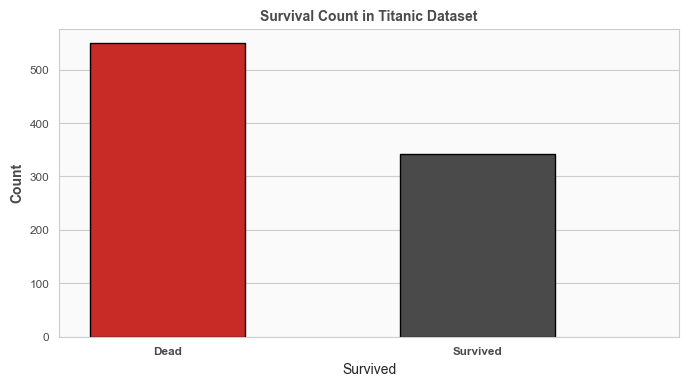

In [10]:
# Count the number of survivors and non-survivors
dead_count = titanic_data["Survived"].value_counts()[0]
survived_count = titanic_data["Survived"].value_counts()[1]

# Print the counts
print(
    f"Number of people dead as 0 are {dead_count} and Number of people survived as 1 are {survived_count}"
)

# Create a count plot with enhanced visualization
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")
ax = sns.countplot(
    x=titanic_data["Survived"],
    palette=["#e3120b", "#4a4a4a"],  # Custom colors for dead and survived
    edgecolor="black",
)

# Adjust bar width
for bar in ax.patches:
    bar.set_width(0.5)  # Increase the width of the bars (default is ~0.5)

# Center x-axis labels
ax.set_xticks(
    [bar.get_x() + bar.get_width() / 2 for bar in ax.patches]
)  # Center labels
ax.set_xticklabels(
    ["Dead", "Survived"], fontsize=8.5, fontweight="bold", color="#4a4a4a"
)

# Customize the plot
ax.set_facecolor("#fafafa")  # Set background color
plt.title(
    "Survival Count in Titanic Dataset", fontsize=10, fontweight="bold", color="#4a4a4a"
)
plt.ylabel("Count", fontsize=10, fontweight="bold", color="#4a4a4a")
plt.yticks(fontsize=8.5, color="#4a4a4a")

# Show the plot
plt.show()

In [11]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

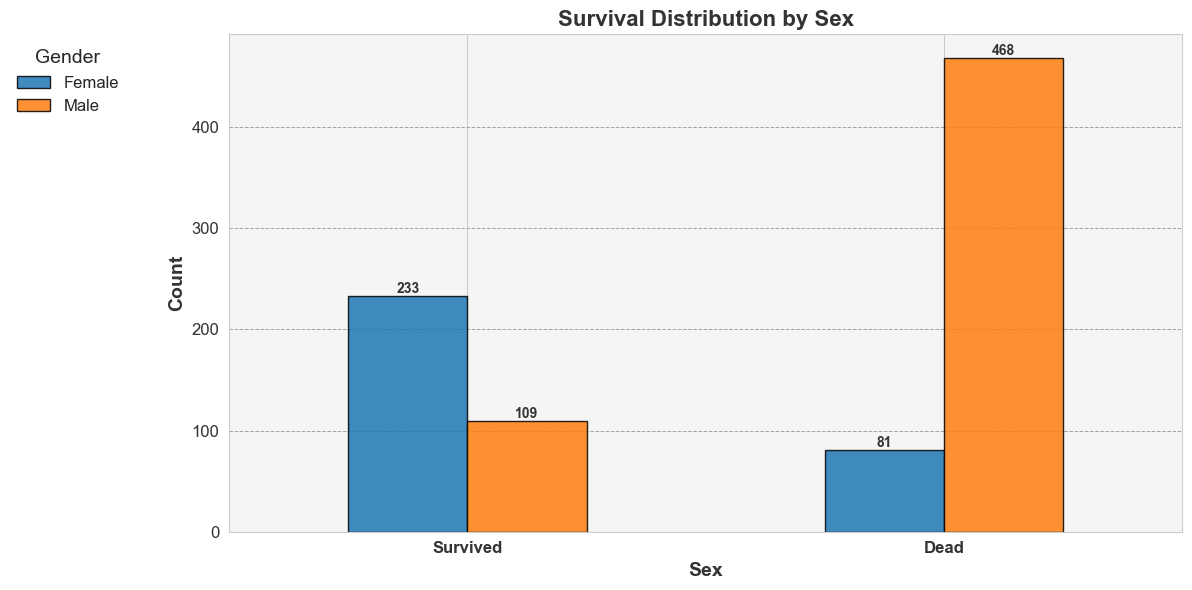

In [12]:
def bar_chart(column):
    # Calculate counts for survivors and non-survivors
    survived = titanic_data[titanic_data["Survived"] == 1][column].value_counts()
    dead = titanic_data[titanic_data["Survived"] == 0][column].value_counts()

    # Create a DataFrame for plotting
    df1 = pd.DataFrame([survived, dead])
    df1.index = ["Survived", "Dead"]

    # Plot the bar chart
    ax = df1.plot(
        kind="bar",
        figsize=(12, 6),
        color=["#1f77b4", "#ff7f0e"],  # Custom colors for better contrast
        edgecolor="black",
        alpha=0.85,  # Slight transparency for a softer look
    )

    # Customize the plot
    ax.set_facecolor("#f5f5f5")  # Light gray background for better contrast
    plt.title(
        f"Survival Distribution by {column}",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    plt.xlabel(column, fontsize=14, fontweight="bold", color="#333333")
    plt.ylabel("Count", fontsize=14, fontweight="bold", color="#333333")
    plt.xticks(fontsize=12, fontweight="bold", color="#333333", rotation=0)
    plt.yticks(fontsize=12, color="#333333")

    # Set the legend to "Female" and "Male"
    plt.legend(
        ["Female", "Male"],
        fontsize=12,
        title="Gender",
        title_fontsize=14,
        bbox_to_anchor=(-0.1, 1),
        frameon=False,  # Remove legend box for a cleaner look
    )

    # Add gridlines
    plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7, color="gray")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",  # Display the count as an integer
            (
                p.get_x() + p.get_width() / 2,
                p.get_height(),
            ),  # Position at the top of the bar
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
            color="#333333",
        )

    # Show the plot
    plt.tight_layout()
    plt.show()


# Call the function for the "Sex" column
bar_chart("Sex")

C:\Users\marja\AppData\Local\Temp\ipykernel_10772\3525488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


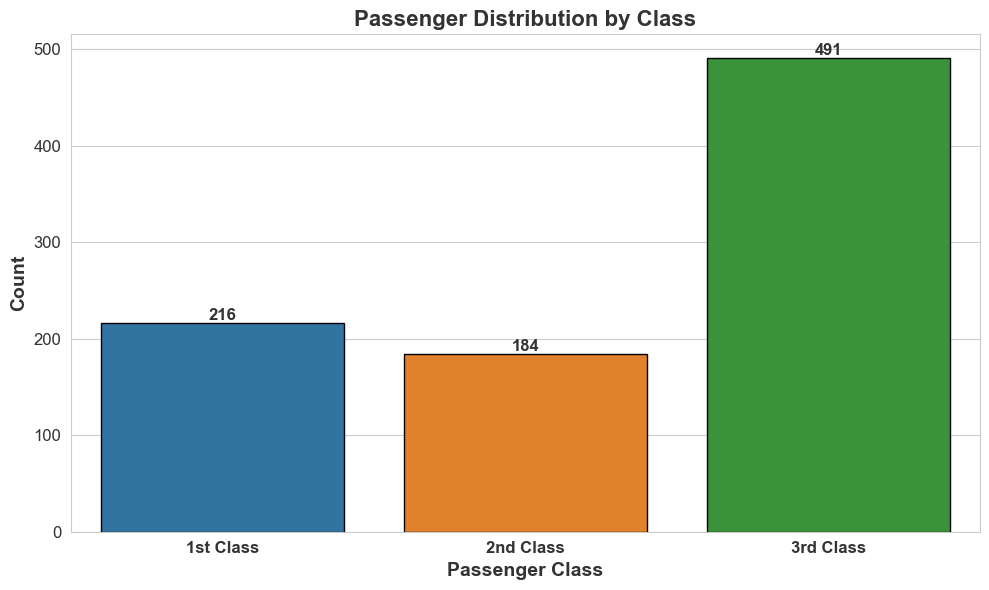

In [13]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.countplot(
    x=titanic_data["Pclass"],
    palette=["#1f77b4", "#ff7f0e", "#2ca02c"],  # Custom colors for each class
    edgecolor="black",
)

# Adjust bar width
for bar in ax.patches:
    bar.set_width(0.8)  # Increase the width of the bars (default is ~0.5)

# Customize the plot
plt.title(
    "Passenger Distribution by Class", fontsize=16, fontweight="bold", color="#333333"
)
plt.xlabel("Passenger Class", fontsize=14, fontweight="bold", color="#333333")
plt.ylabel("Count", fontsize=14, fontweight="bold", color="#333333")
plt.xticks(
    [0, 1, 2],
    ["1st Class", "2nd Class", "3rd Class"],
    fontsize=12,
    fontweight="bold",
    color="#333333",
)
plt.yticks(fontsize=12, color="#333333")

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",  # Display the count as an integer
        (
            p.get_x() + p.get_width() / 2,
            p.get_height(),
        ),  # Position at the top of the bar
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="#333333",
    )

# Show the plot
plt.tight_layout()
plt.show()

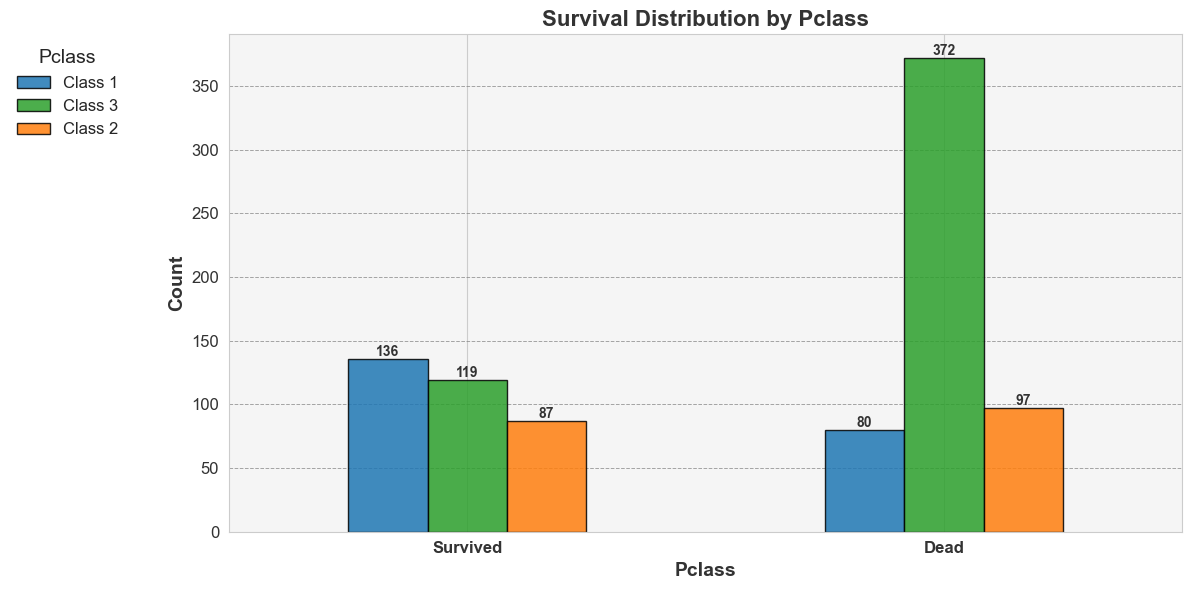

In [14]:
def bar_chart(column):
    # Calculate counts for survivors and non-survivors
    survived = titanic_data[titanic_data["Survived"] == 1][column].value_counts()
    dead = titanic_data[titanic_data["Survived"] == 0][column].value_counts()

    # Create a DataFrame for plotting
    df1 = pd.DataFrame([survived, dead])
    df1.index = ["Survived", "Dead"]

    # Define colors for Pclass (3 different colors)
    if column == "Pclass":
        colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]  # Blue, Orange, Green
        legend_labels = ["Class 1", "Class 3", "Class 2"]
    else:
        colors = ["#1f77b4", "#ff7f0e"]  # Default colors
        legend_labels = ["Female", "Male"]

    # Plot the bar chart
    ax = df1.plot(
        kind="bar", figsize=(12, 6), color=colors, edgecolor="black", alpha=0.85
    )

    # Customize the plot
    ax.set_facecolor("#f5f5f5")  # Light gray background for better contrast
    plt.title(
        f"Survival Distribution by {column}",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    plt.xlabel(column, fontsize=14, fontweight="bold", color="#333333")
    plt.ylabel("Count", fontsize=14, fontweight="bold", color="#333333")
    plt.xticks(fontsize=12, fontweight="bold", color="#333333", rotation=0)
    plt.yticks(fontsize=12, color="#333333")

    # Set the legend dynamically based on the column
    plt.legend(
        legend_labels,
        fontsize=12,
        title=column,
        title_fontsize=14,
        bbox_to_anchor=(-0.1, 1),
        frameon=False,  # Remove legend box for a cleaner look
    )

    # Add gridlines
    plt.grid(axis="y", linestyle="--", linewidth=0.7, alpha=0.7, color="gray")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_height())}",  # Display the count as an integer
            (
                p.get_x() + p.get_width() / 2,
                p.get_height(),
            ),  # Position at the top of the bar
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
            color="#333333",
        )

    # Show the plot
    plt.tight_layout()
    plt.show()


# Call the function for the "Pclass" column
bar_chart("Pclass")

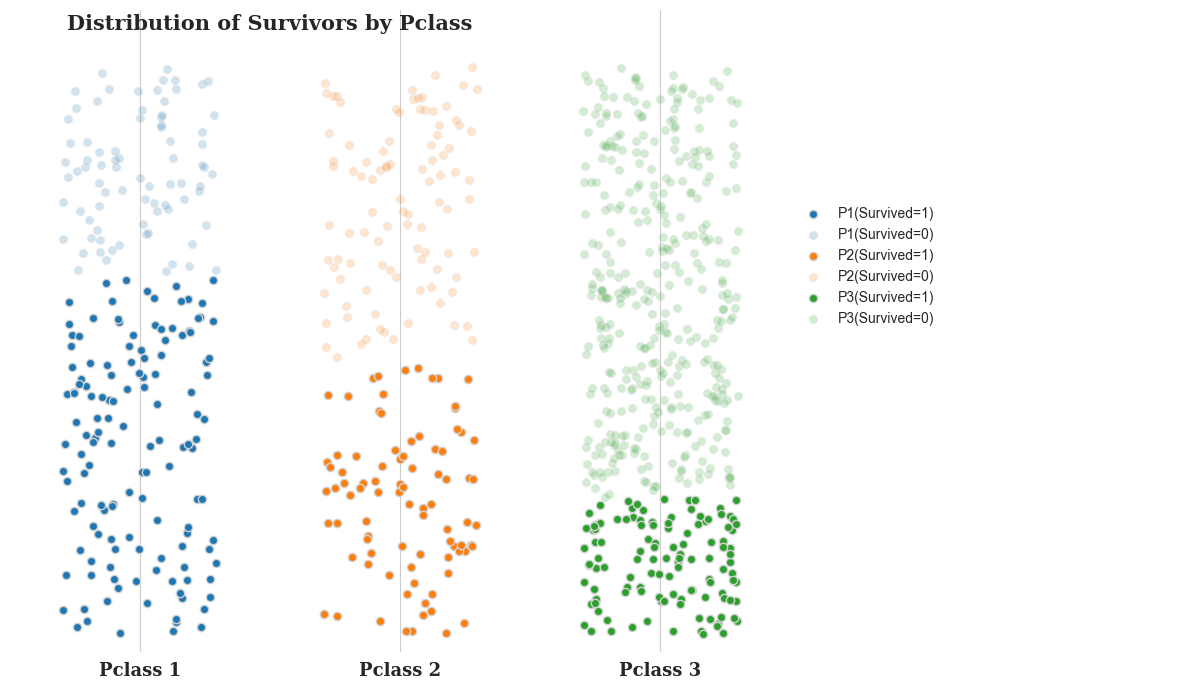

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure only numeric columns are used for the groupby operation
survival_rate = titanic_data.groupby(["Pclass"]).mean(numeric_only=True)[["Survived"]]

# Extract survival rates for each Pclass
p1_rate = survival_rate.loc[1]
p2_rate = survival_rate.loc[2]
p3_rate = survival_rate.loc[3]

# Generate random positions for scatter points
p1_pos = np.random.uniform(
    0,
    p1_rate,
    len(titanic_data[(titanic_data["Pclass"] == 1) & (titanic_data["Survived"] == 1)]),
)
p1_neg = np.random.uniform(
    p1_rate,
    1,
    len(titanic_data[(titanic_data["Pclass"] == 1) & (titanic_data["Survived"] == 0)]),
)
p2_pos = np.random.uniform(
    0,
    p2_rate,
    len(titanic_data[(titanic_data["Pclass"] == 2) & (titanic_data["Survived"] == 1)]),
)
p2_neg = np.random.uniform(
    p2_rate,
    1,
    len(titanic_data[(titanic_data["Pclass"] == 2) & (titanic_data["Survived"] == 0)]),
)
p3_pos = np.random.uniform(
    0,
    p3_rate,
    len(titanic_data[(titanic_data["Pclass"] == 3) & (titanic_data["Survived"] == 1)]),
)
p3_neg = np.random.uniform(
    p3_rate,
    1,
    len(titanic_data[(titanic_data["Pclass"] == 3) & (titanic_data["Survived"] == 0)]),
)

# Create the scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

np.random.seed(42)

# Assign distinct colors for each Pclass
p1_color = "#1f77b4"  # Blue for Pclass 1
p2_color = "#ff7f0e"  # Orange for Pclass 2
p3_color = "#2ca02c"  # Green for Pclass 3

ax.scatter(
    np.random.uniform(-0.3, 0.3, len(p1_pos)),
    p1_pos,
    color=p1_color,
    edgecolor="lightgray",
    label="P1(Survived=1)",
)
ax.scatter(
    np.random.uniform(-0.3, 0.3, len(p1_neg)),
    p1_neg,
    color=p1_color,
    edgecolor="lightgray",
    alpha=0.2,
    label="P1(Survived=0)",
)
ax.scatter(
    np.random.uniform(1 - 0.3, 1 + 0.3, len(p2_pos)),
    p2_pos,
    color=p2_color,
    edgecolor="lightgray",
    label="P2(Survived=1)",
)
ax.scatter(
    np.random.uniform(1 - 0.3, 1 + 0.3, len(p2_neg)),
    p2_neg,
    color=p2_color,
    edgecolor="lightgray",
    alpha=0.2,
    label="P2(Survived=0)",
)
ax.scatter(
    np.random.uniform(2 - 0.3, 2 + 0.3, len(p3_pos)),
    p3_pos,
    color=p3_color,
    edgecolor="lightgray",
    label="P3(Survived=1)",
)
ax.scatter(
    np.random.uniform(2 - 0.3, 2 + 0.3, len(p3_neg)),
    p3_neg,
    color=p3_color,
    edgecolor="lightgray",
    alpha=0.2,
    label="P3(Survived=0)",
)

# Set Figure & Axes
ax.set_xlim(-0.5, 4.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(
    ["Pclass 1", "Pclass 2", "Pclass 3"],
    fontweight="bold",
    fontfamily="serif",
    fontsize=13,
)
ax.set_yticks([], minor=False)
ax.set_ylabel("")

# Spines
for s in ["top", "right", "left", "bottom"]:
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(
    0.06,
    0.95,
    "Distribution of Survivors by Pclass",
    fontweight="bold",
    fontfamily="serif",
    fontsize=15,
    ha="left",
)

ax.legend(loc=(0.67, 0.5), edgecolor="None")
plt.tight_layout()
plt.show()

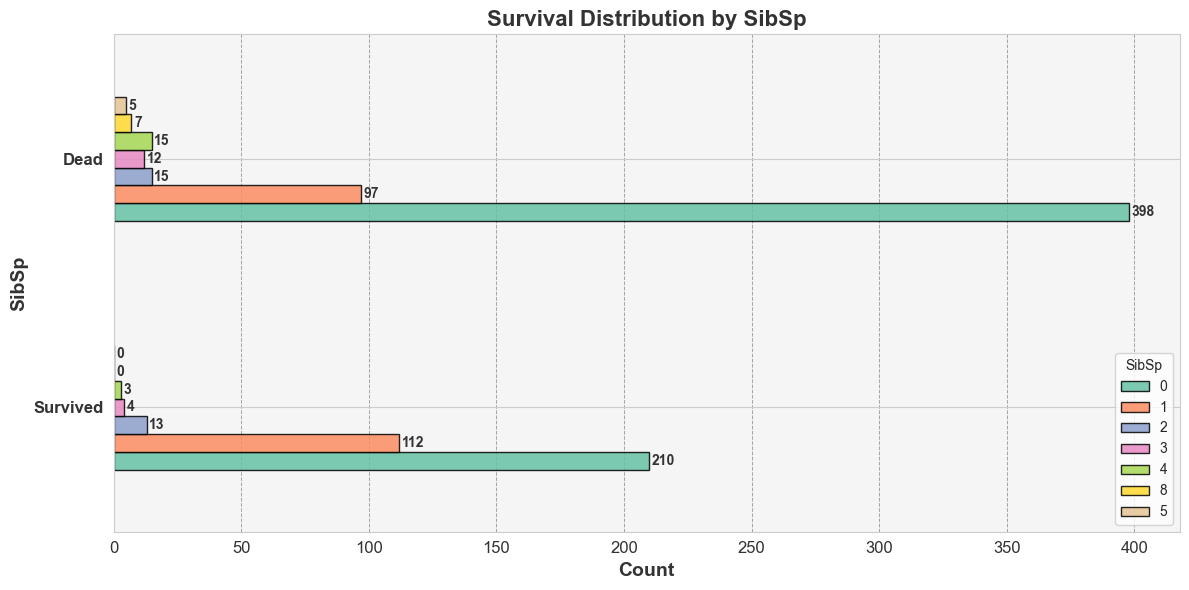

In [16]:
def bar_chart(column):
    # Calculate counts for survivors and non-survivors
    survived = titanic_data[titanic_data["Survived"] == 1][column].value_counts()
    dead = titanic_data[titanic_data["Survived"] == 0][column].value_counts()

    # Create a DataFrame for plotting
    df1 = pd.DataFrame([survived, dead])
    df1.index = ["Survived", "Dead"]

    # Use a colorful palette for the bars
    colors = sns.color_palette(
        "Set2", len(df1.columns)
    )  # Generate a palette with unique colors

    # Plot the bar chart horizontally
    ax = df1.plot(
        kind="barh",  # Horizontal bar chart
        figsize=(12, 6),
        color=colors,
        edgecolor="black",
        alpha=0.85,
    )

    # Customize the plot
    ax.set_facecolor("#f5f5f5")  # Light gray background for better contrast
    plt.title(
        f"Survival Distribution by {column}",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    plt.xlabel("Count", fontsize=14, fontweight="bold", color="#333333")
    plt.ylabel(column, fontsize=14, fontweight="bold", color="#333333")
    plt.xticks(fontsize=12, color="#333333")
    plt.yticks(fontsize=12, fontweight="bold", color="#333333")

    # Add gridlines
    plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7, color="gray")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_width())}",  # Display the count as an integer
            (
                p.get_width() + 1,
                p.get_y() + p.get_height() / 2,
            ),  # Position at the end of the bar
            ha="left",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="#333333",
        )

    # Show the plot
    plt.tight_layout()
    plt.show()


# Call the function for the "SibSp" column
bar_chart("SibSp")

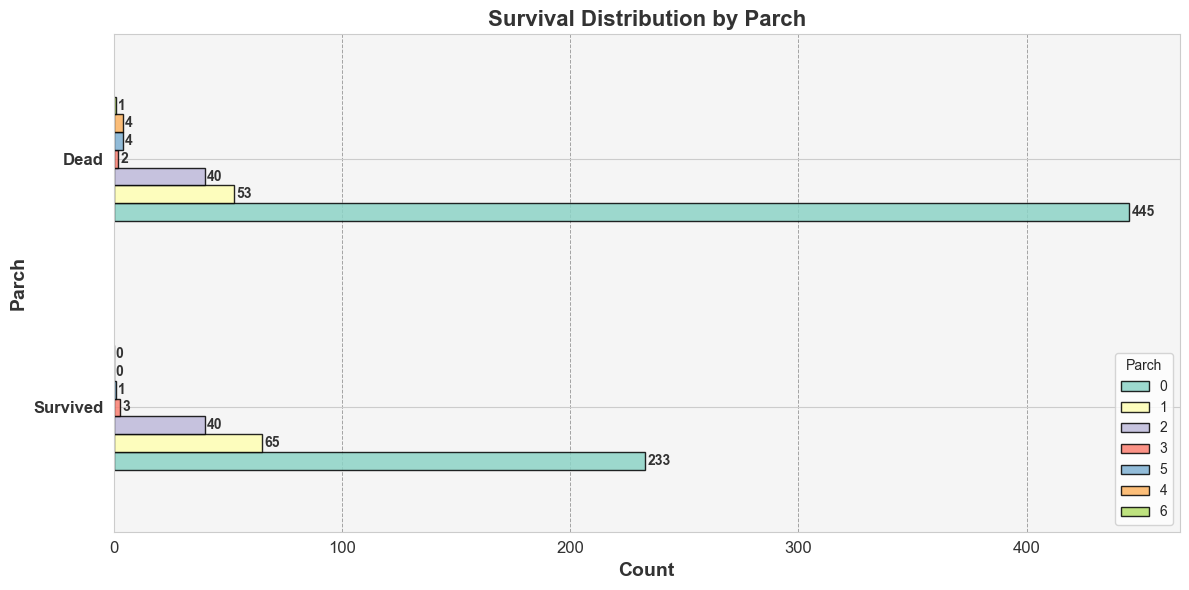

In [17]:
def bar_chart(column):
    # Calculate counts for survivors and non-survivors
    survived = titanic_data[titanic_data["Survived"] == 1][column].value_counts()
    dead = titanic_data[titanic_data["Survived"] == 0][column].value_counts()

    # Create a DataFrame for plotting
    df1 = pd.DataFrame([survived, dead])
    df1.index = ["Survived", "Dead"]

    # Use a colorful palette for the bars
    colors = sns.color_palette(
        "Set3", len(df1.columns)
    )  # Generate a palette with unique colors

    # Plot the bar chart horizontally
    ax = df1.plot(
        kind="barh",  # Horizontal bar chart
        figsize=(12, 6),
        color=colors,
        edgecolor="black",
        alpha=0.85,
    )

    # Customize the plot
    ax.set_facecolor("#f5f5f5")  # Light gray background for better contrast
    plt.title(
        f"Survival Distribution by {column}",
        fontsize=16,
        fontweight="bold",
        color="#333333",
    )
    plt.xlabel("Count", fontsize=14, fontweight="bold", color="#333333")
    plt.ylabel(column, fontsize=14, fontweight="bold", color="#333333")
    plt.xticks(fontsize=12, color="#333333")
    plt.yticks(fontsize=12, fontweight="bold", color="#333333")

    # Add gridlines
    plt.grid(axis="x", linestyle="--", linewidth=0.7, alpha=0.7, color="gray")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(
            f"{int(p.get_width())}",  # Display the count as an integer
            (
                p.get_width() + 1,
                p.get_y() + p.get_height() / 2,
            ),  # Position at the end of the bar
            ha="left",
            va="center",
            fontsize=10,
            fontweight="bold",
            color="#333333",
        )

    # Show the plot
    plt.tight_layout()
    plt.show()


# Call the function for the "Parch" column
bar_chart("Parch")

In [18]:
# Count the number of rows where Pclass is 2 and Survived is 1
count_pclass_2 = ((titanic_data["Parch"] == 1) & (titanic_data["Survived"] == 1)).sum()
count_pclass_2

65

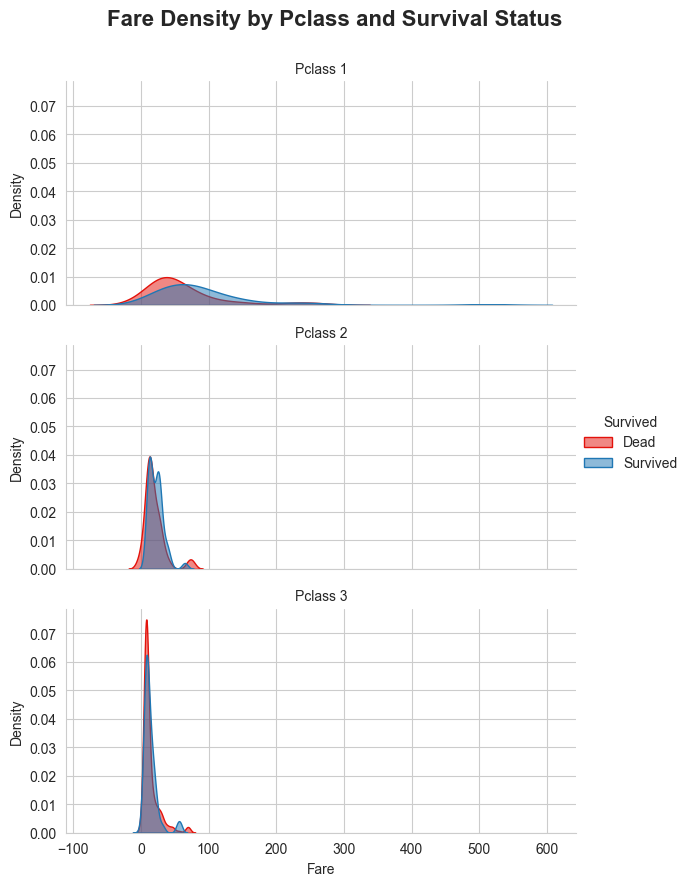

In [19]:
g = sns.FacetGrid(
    titanic_data,
    row="Pclass",
    hue="Survived",
    height=3,
    aspect=2,
    palette=["#e3120b", "#1f77b4"],
)
g.map(sns.kdeplot, "Fare", fill=True, alpha=0.5)
g.add_legend(title="Survived", labels=["Dead", "Survived"])
g.set_titles("Pclass {row_name}")
g.set_axis_labels("Fare", "Density")
plt.subplots_adjust(top=0.9)  # Adjust space for the title
g.fig.suptitle(
    "Fare Density by Pclass and Survival Status", fontsize=16, fontweight="bold"
)
plt.show()

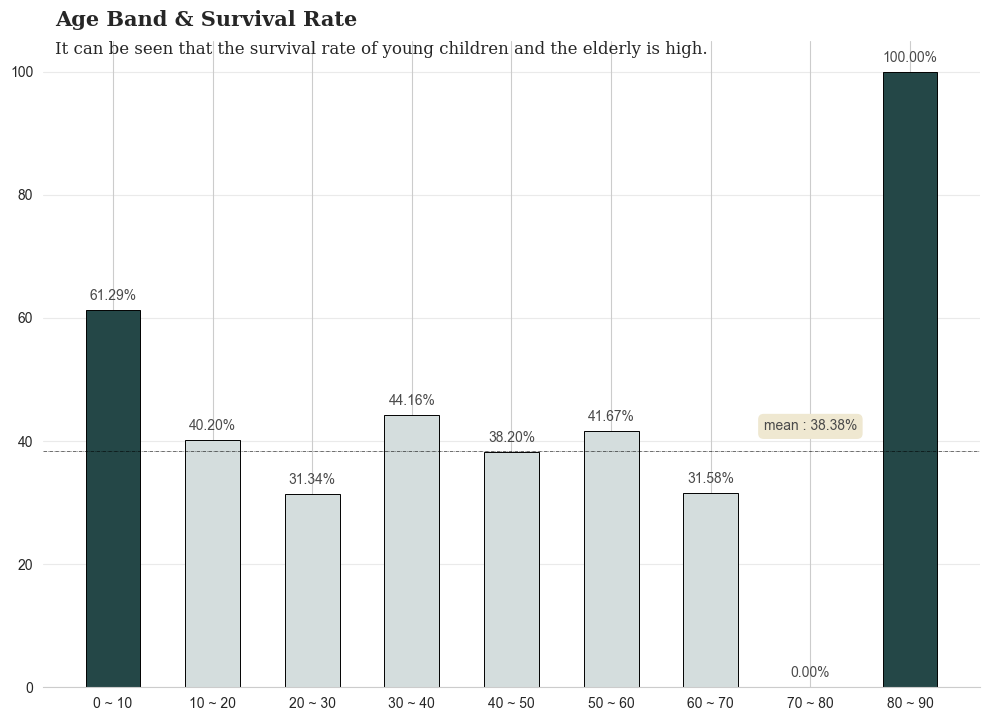

In [20]:
def age_band(num):
    for i in range(1, 100):
        if num < 10 * i:
            return f"{(i-1) * 10} ~ {i*10}"


titanic_data["age_band"] = titanic_data["Age"].apply(age_band)
titanic_age = (
    titanic_data[["age_band", "Survived"]]
    .groupby("age_band")["Survived"]
    .value_counts()
    .sort_index()
    .unstack()
    .fillna(0)
)
titanic_age["Survival rate"] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ["#d4dddd" for _ in range(9)]
color_map[0] = color_map[8] = "#244747"  # color highlight

ax.bar(
    titanic_age["Survival rate"].index,
    titanic_age["Survival rate"],
    color=color_map,
    width=0.55,
    edgecolor="black",
    linewidth=0.7,
)


for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age["Survival rate"].index:
    ax.annotate(
        f"{titanic_age['Survival rate'][i]:.02f}%",
        xy=(i, titanic_age["Survival rate"][i] + 2.3),
        va="center",
        ha="center",
        fontweight="light",
        color="#4a4a4a",
    )


# mean line + annotation
mean = titanic_data["Survived"].mean() * 100
ax.axhline(mean, color="black", linewidth=0.4, linestyle="dashdot")
ax.annotate(
    f"mean : {mean :.4}%",
    xy=("70 ~ 80", mean + 4),
    va="center",
    ha="center",
    color="#4a4a4a",
    bbox=dict(boxstyle="round", pad=0.4, facecolor="#efe8d1", linewidth=0),
)


# Title & Subtitle
fig.text(
    0.06,
    1,
    "Age Band & Survival Rate",
    fontsize=15,
    fontweight="bold",
    fontfamily="serif",
)
fig.text(
    0.06,
    0.96,
    "It can be seen that the survival rate of young children and the elderly is high.",
    fontsize=12,
    fontweight="light",
    fontfamily="serif",
)

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis="y", linestyle="-", alpha=0.4)

plt.tight_layout()
plt.show()

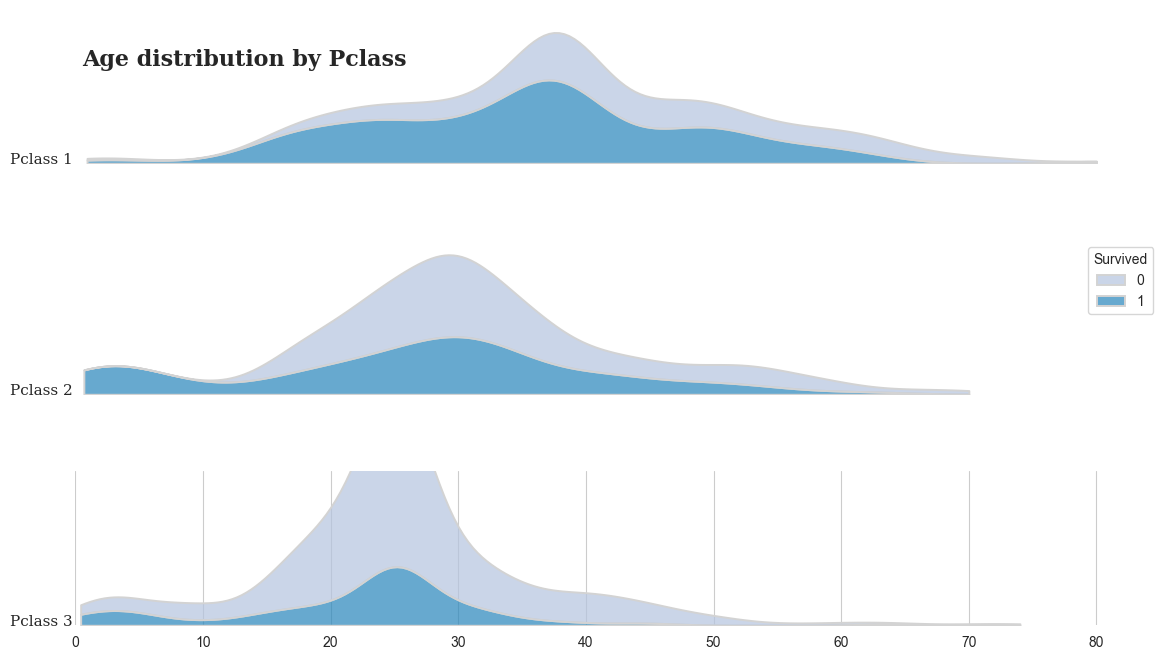

In [21]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(3, 1)
gs.update(hspace=0.5)  # Increased hspace to add more distance between charts

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(titanic_data["Pclass"].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    # You can also draw density plot with matplotlib + scipy.
    sns.kdeplot(
        x="Age",
        data=titanic_data[titanic_data["Pclass"] == cls],
        fill=True,
        ax=axes[idx],
        cut=0,
        bw_method=0.25,
        lw=1.4,
        edgecolor="lightgray",
        hue="Survived",
        multiple="stack",
        palette="PuBu",
        alpha=0.7,
    )

    # Adjust ylim to ensure the full chart is visible
    axes[idx].set_ylim(0, 0.045)  # Increased the upper limit slightly
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2:
        axes[idx].set_xticks([])
    axes[idx].set_ylabel("")
    axes[idx].set_xlabel("")

    spines = ["top", "right", "left", "bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(
        -0.2,
        0,
        f"Pclass {cls}",
        fontweight="light",
        fontfamily="serif",
        fontsize=11,
        ha="right",
    )
    if idx != 1:
        axes[idx].get_legend().remove()

fig.text(
    0.13,
    0.81,
    "Age distribution by Pclass",
    fontweight="bold",
    fontfamily="serif",
    fontsize=16,
)

plt.show()

In [22]:
import plotly.express as px

# Create a scatter plot using Plotly
fig = px.scatter(
    titanic_data,
    x="Age",
    y="Survived",
    size="Fare",  # Bubble size based on Fare
    color="Fare",  # Color based on Fare
    log_x=True,  # Logarithmic scale for Age
    size_max=50,  # Maximum bubble size
    template="plotly_dark",  # Dark theme
    title="Age vs Survived",
)

# Show the plot
fig.show()

In [23]:
import plotly.express as px

# Map Embarked values to descriptive labels
titanic_data["Embarked_Label"] = titanic_data["Embarked"].map(
    {
        "C": "C: Cherbourg (France)",
        "Q": "Q: Queenstown (Ireland)",
        "S": "S: Southampton (England)",
    }
)

# Create a scatter plot for Survived vs Embarked
fig = px.scatter(
    titanic_data,
    x="Embarked_Label",  # Use the mapped column for descriptive x-axis labels
    y="Survived",
    size="Fare",  # Bubble size based on Fare
    color="Fare",  # Color based on Fare
    size_max=50,  # Maximum bubble size
    template="plotly_dark",  # Dark theme
    title="Survived vs Embarked",
)

# Show the plot
fig.show()